In [6]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df_all <-
  read_csv("data/tidy_ons_longcovid.csv",
          col_types = "ccfd")%>%
  filter(Domain=="Duration since first (suspected) coronavirus infection")%>%
  filter(Group!="Unknown duration")%>%
  select(-Domain, -filename, -`Lower 95% confidence limit`, , -`Upper 95% confidence limit`)%>%
  mutate(`Impact on daily activity` = as.factor(`Impact on daily activity`))%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))%>%
  mutate(ISOweek = ISOweek::ISOweek(Date))%>%
  mutate(middle = case_when(Group=="0 to <12 weeks"~4,
                         Group=="12 to <26 weeks"~19,
                         Group=="26 to <39 weeks"~33,
                         Group=="39 to <52 weeks"~45,
                         Group=="52 to <78 weeks"~65,
                         Group==">= 52 weeks"~65,
                         Group=="78 to <104 weeks"~91,
                         Group=="104+ weeks"~117,
                        T~NA))

df_all%>%arrange(Date)%>%tail

Impact on daily activity,Group,Estimate,Date,ISOweek,middle
<fct>,<fct>,<dbl>,<date>,<chr>,<dbl>
Activity limited a lot,12 to <26 weeks,21,2023-03-05,2023-W09,19
Activity limited a lot,26 to <39 weeks,22,2023-03-05,2023-W09,33
Activity limited a lot,39 to <52 weeks,43,2023-03-05,2023-W09,45
Activity limited a lot,52 to <78 weeks,73,2023-03-05,2023-W09,65
Activity limited a lot,78 to <104 weeks,17,2023-03-05,2023-W09,91
Activity limited a lot,104+ weeks,175,2023-03-05,2023-W09,117


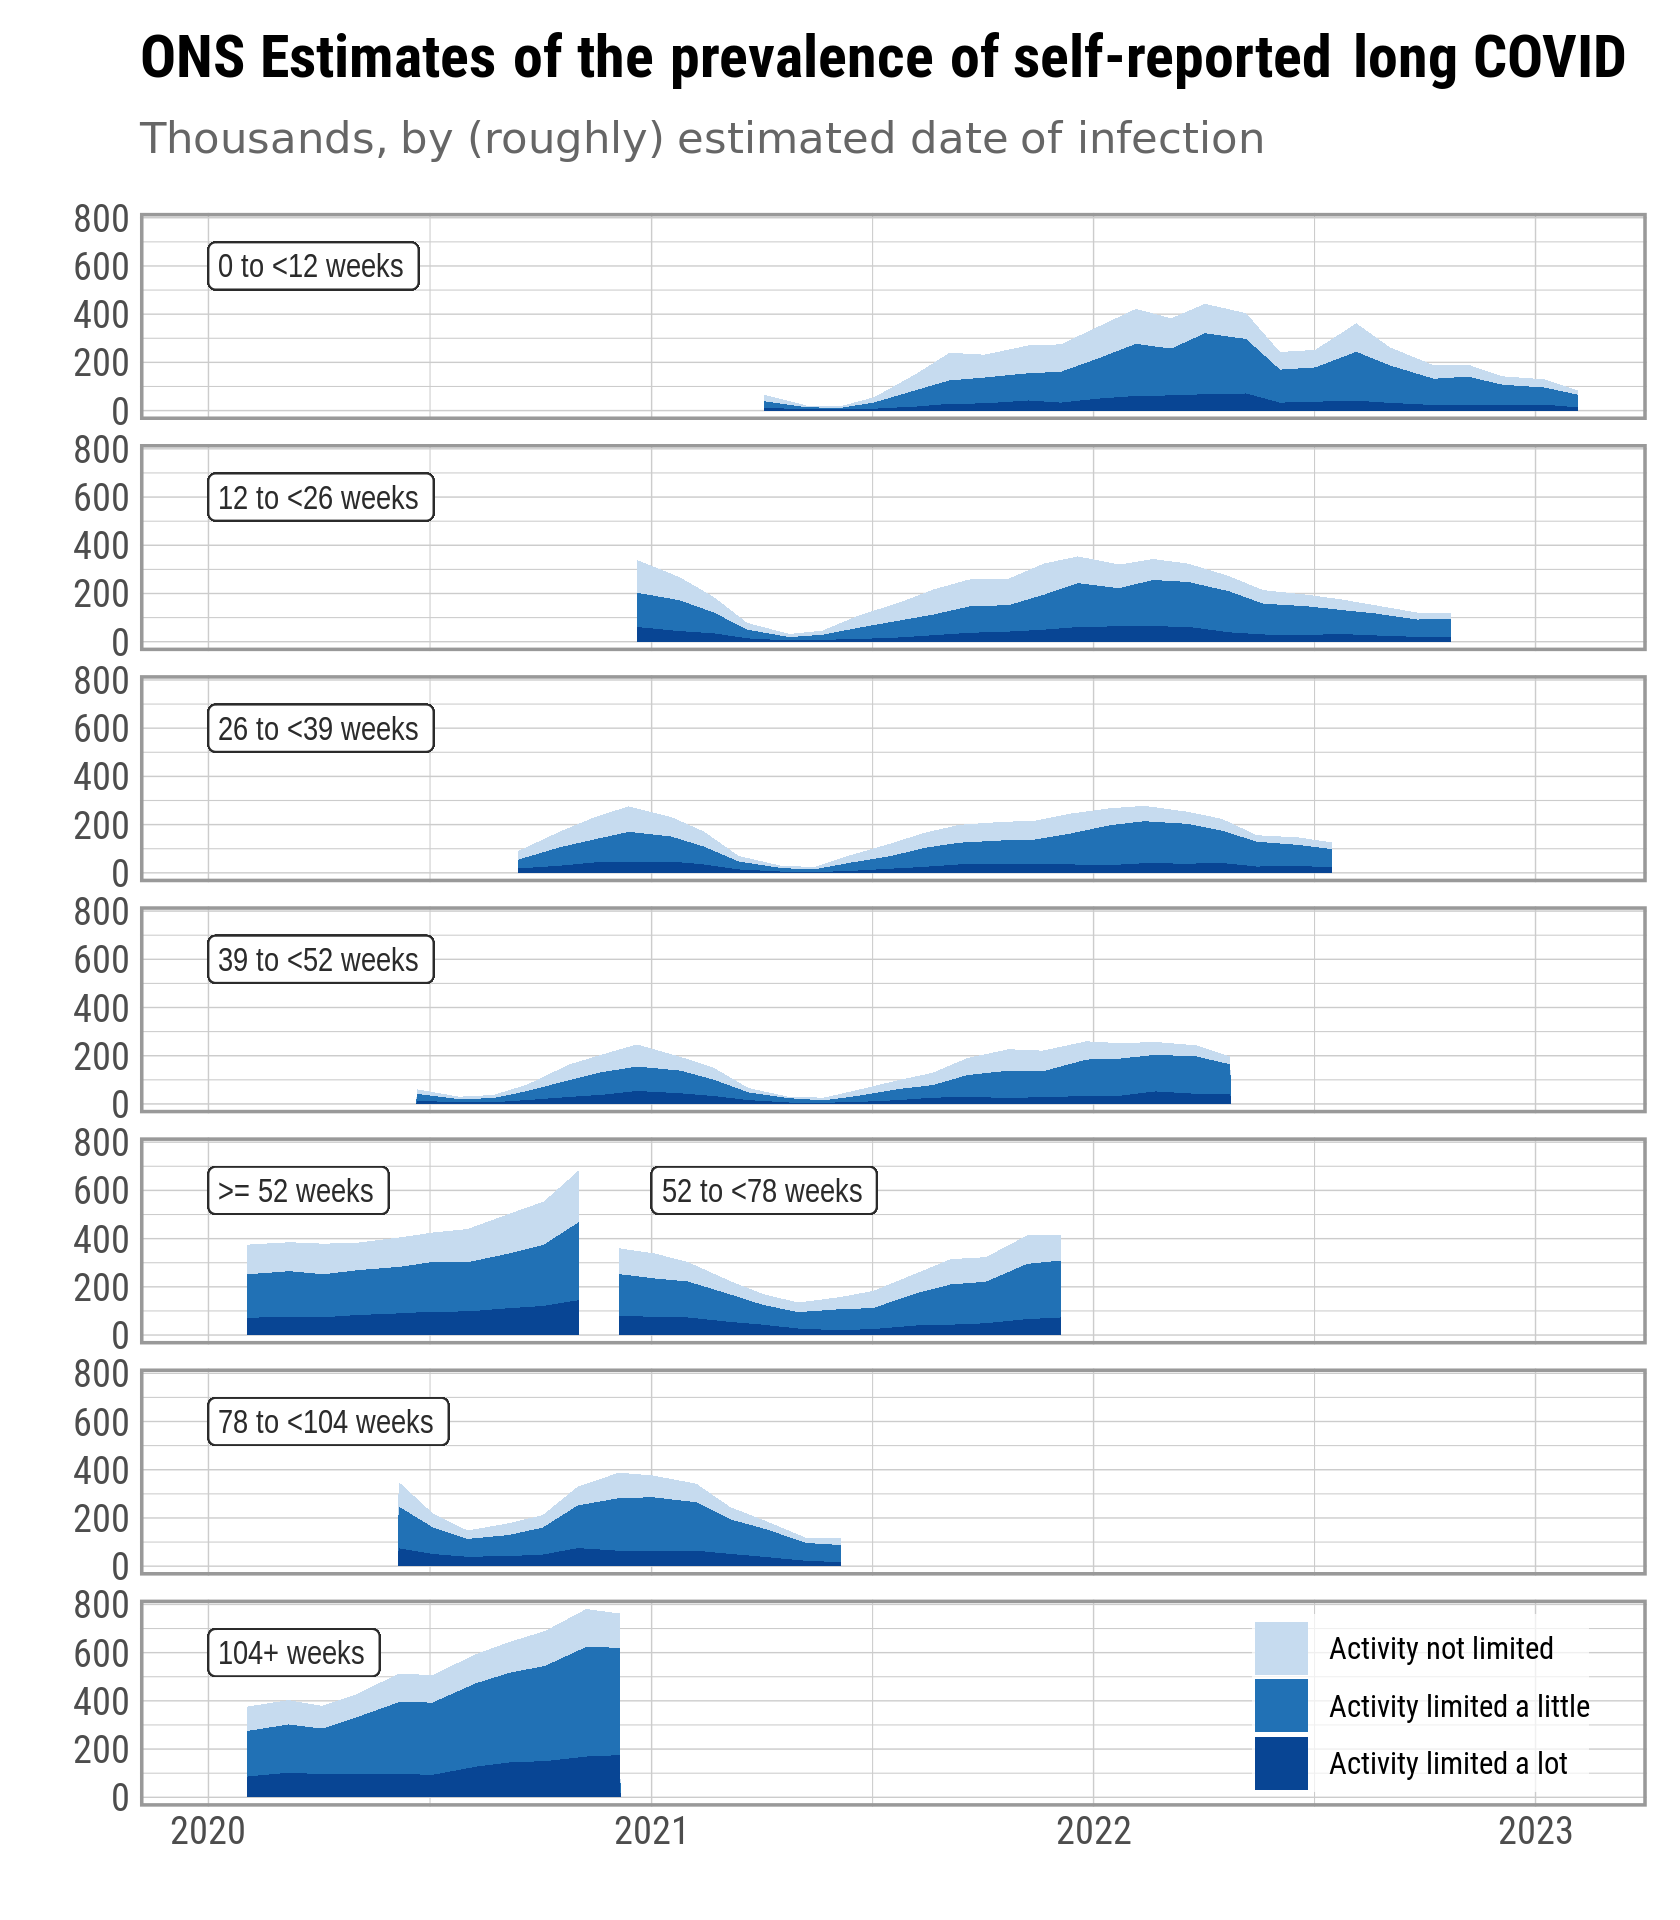

In [5]:
s = 1
options(repr.plot.width = s*7, repr.plot.height = s*8, repr.plot.res = 240/s)

df_all%>%
  mutate(InfectionDate = Date-middle*7)%>%
  mutate(cat = ifelse(Group == ">= 52 weeks", 5, Group))%>%
  mutate(label_pos = as.Date(ifelse(Group == "52 to <78 weeks", "2021-01-01", "2020-01-01")))%>%
  filter(InfectionDate >= "2020-02-01")%>%
  ggplot(aes(x = InfectionDate, y = Estimate,
             group = interaction(Group, `Impact on daily activity`),
             fill = `Impact on daily activity`)) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Thousands, by (roughly) estimated date of infection",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_y_continuous(breaks = seq(0, 1000, 200)) +
  geom_label(aes(x = label_pos, y = 600, label = Group),
             hjust = 0, fill = "white", alpha = 0.8) +
  facet_wrap(cat~., ncol = 1)+ 
  theme(strip.background = element_blank(),
        strip.text.x = element_blank(),
        panel.spacing = unit(0.5, "lines"),
        panel.border = element_rect(color = "gray60", fill=NA, linewidth=1),
        legend.position = c(0.85, .065),
        legend.margin=margin(t = -.5, unit='cm'),
        legend.box.background = element_rect(fill = alpha("white", 0.7),
            colour = NA)) +
  savePlot("ONS_LC_date_of_infection")


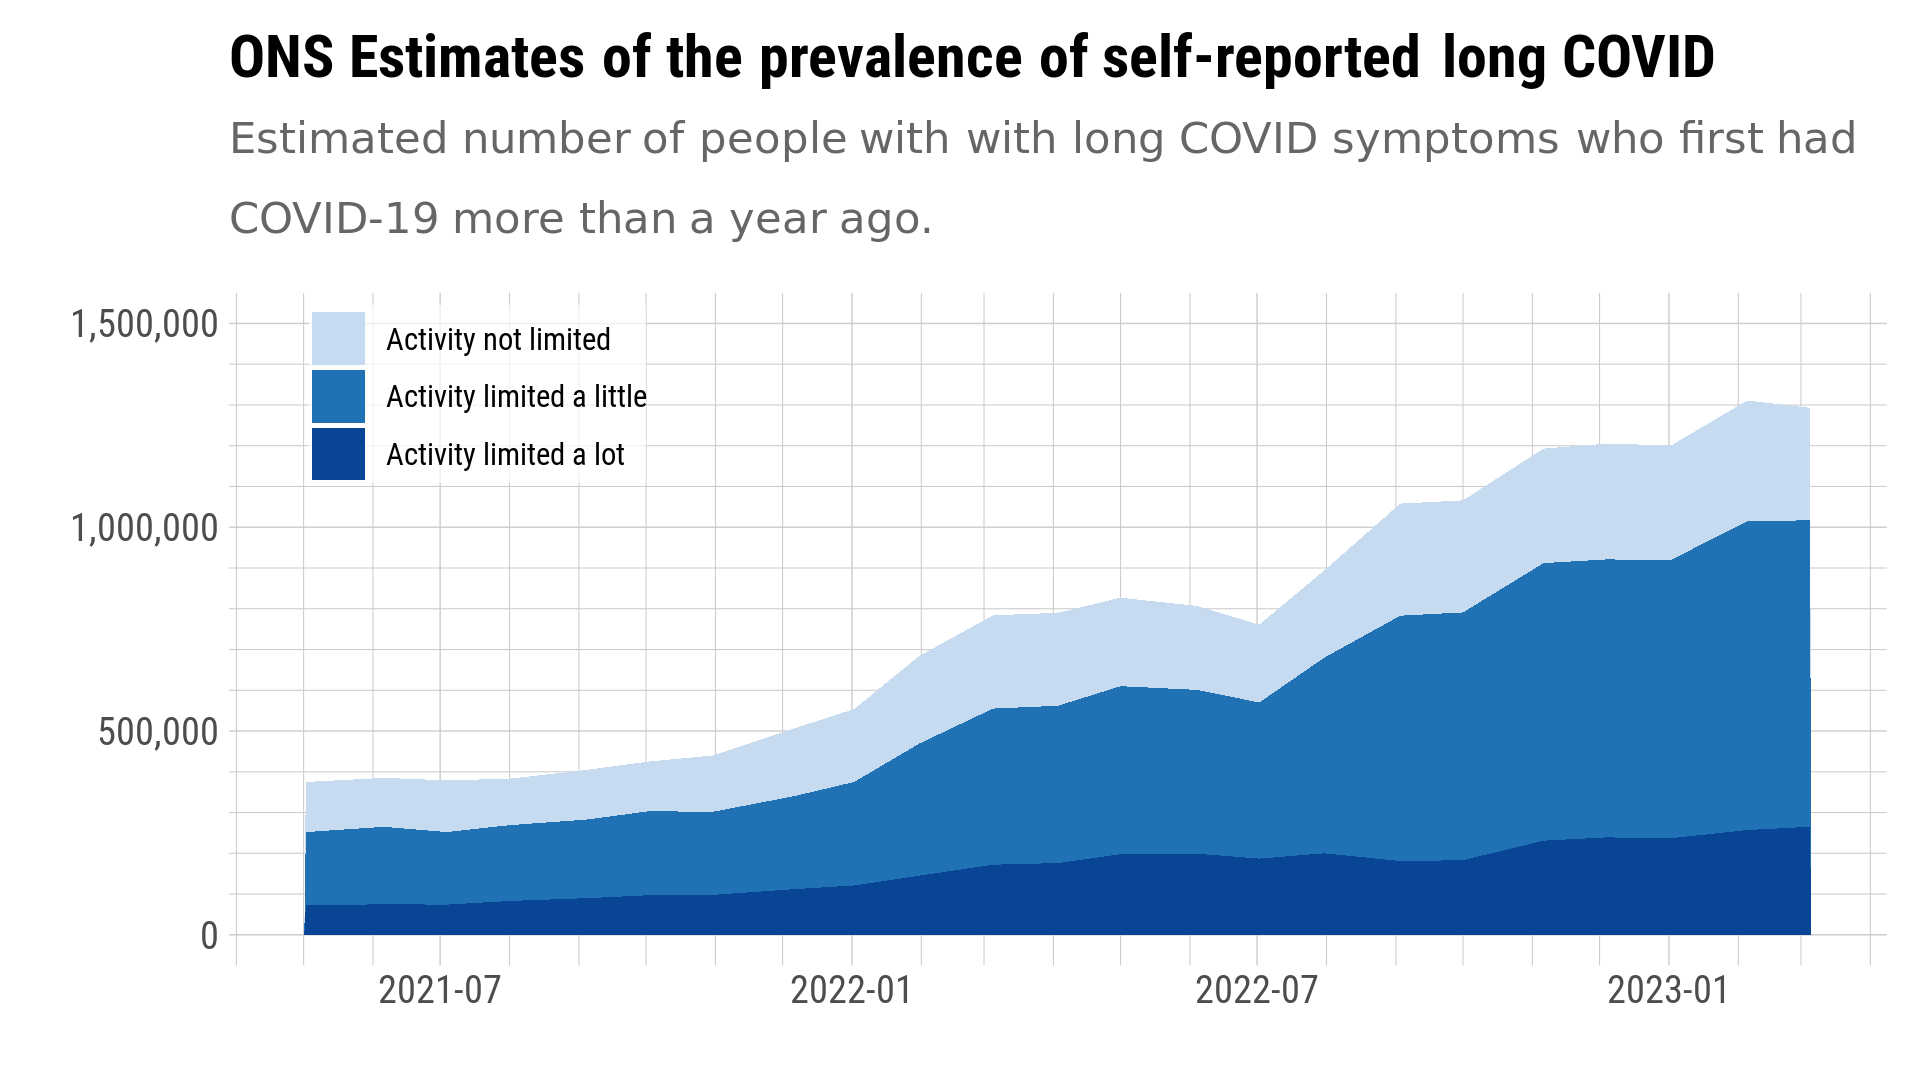

In [4]:
s = 1.
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df_all%>%
  filter(Group %in% c(">= 52 weeks", "52 to <78 weeks", "78 to <104 weeks", "104+ weeks"))%>%
  group_by(Date, `Impact on daily activity`)%>%
  summarise(Estimate = sum(Estimate), na.rm = T, .groups = "drop")%>%
  ggplot(aes(x = Date, y = Estimate*1000, fill = `Impact on daily activity`)) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms who first had<br><br>COVID-19 more than a year ago.",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  scale_y_continuous(labels = scales::comma, limits = c(0,1500000), minor_breaks = seq(0, 2e6, 1e5)) +
  scale_x_date(date_minor_breaks = "1 month") +
  theme(legend.position = c(0.15, .85),
        legend.margin=margin(t = -.5, unit='cm'),
        legend.box.background = element_rect(fill = alpha("white", 0.7),
            colour = NA)) +
  savePlot("ONS_LC_long_haulers")
